# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

Aluno: Deivison rodrigues jordão

## Projeto de ICD - Parte 1

### Uma breve análise do Dataset,abaixo apresentado, para responder o senguinte Questionamento: 
### A idade,o nivel de glicose e o hábito de fumar tem alguma relação com a maior propensão de uma pessoa sofrer um ataque cardíaco? Se sim,em que proporção isso acontece?

In [1]:
import pandas as pd
DataBase = pd.read_csv("healthcare-dataset-stroke-data.csv")
DataBase

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Delimitando os dados que serão usados

In [17]:
DataBase_use = DataBase[["age","avg_glucose_level","smoking_status","stroke"]]
DataBase_use

,age,avg_glucose_level,smoking_status,stroke
0,67.0,228.69,formerly smoked,1
1,61.0,202.21,never smoked,1
2,80.0,105.92,never smoked,1
3,49.0,171.23,smokes,1
4,79.0,174.12,never smoked,1
...,...,...,...,...
5105,80.0,83.75,never smoked,0
5106,81.0,125.20,never smoked,0
5107,35.0,82.99,never smoked,0
5108,51.0,166.29,formerly smoked,0


### Relação entre idade e ataque cardíaco

<AxesSubplot:xlabel='age,stroke'>

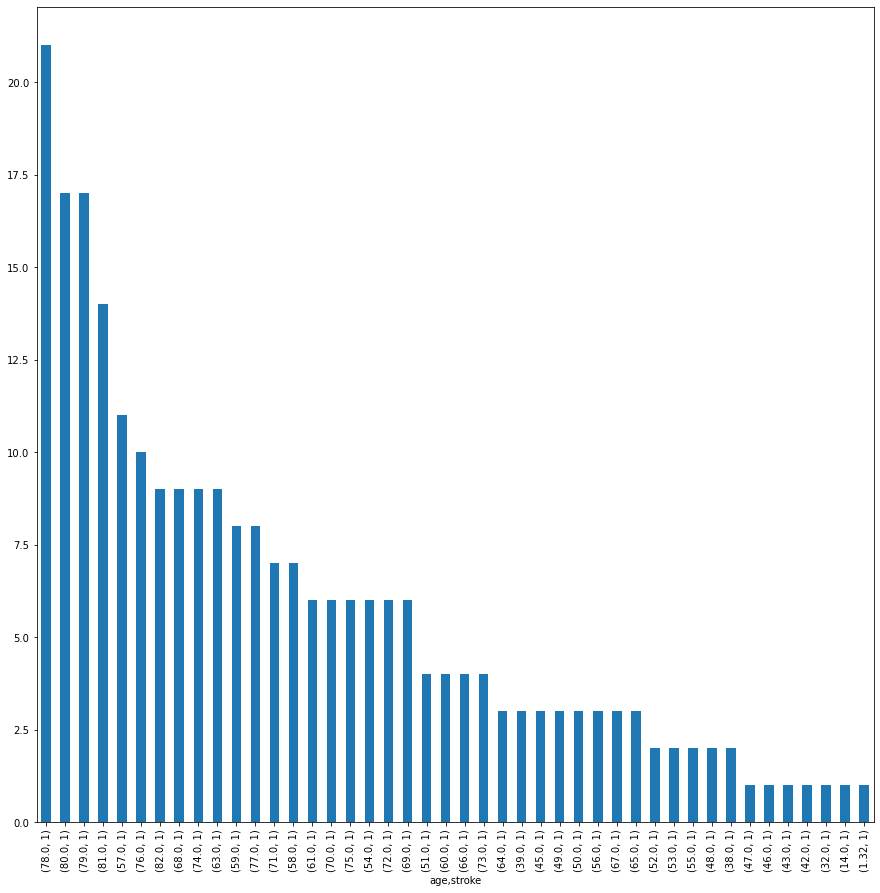

In [93]:
DataBase_stroke_1 = DataBase_use.sort_values("stroke",ascending = False)[["age","avg_glucose_level","smoking_status","stroke"]][0:249]
DataBase_stroke_1.sort_values("age",ascending = False)[["age","stroke"]].value_counts().plot(kind = "bar",figsize =(15,15))

***Ao analisar o gráfico acima,nota-se uma acentuada tendência crescente na frequencia de ataque cardícos conforme o aumento da idade.***

### Relaçâo entre o hábito de fumar e ataque cardíaco

In [106]:
pd.DataFrame(DataBase.sort_values("smoking_status",ascending = False)[["smoking_status","stroke"]].value_counts())

,,0
smoking_status,stroke,
never smoked,0,1802
Unknown,0,1497
formerly smoked,0,815
smokes,0,747
never smoked,1,90
formerly smoked,1,70
Unknown,1,47
smokes,1,42


In [ ]:
pd.DataFrame(DataBase.sort_values("smoking_status",ascending = False)[["smoking_status","stroke"]].value_counts())

***Com a tabela acima se pode calcular a pro***

In [59]:
DataBase_use.sort_values("age",ascending = False)[["age","stroke"]]

,age,stroke
3108,82.00,0
188,82.00,1
1515,82.00,0
1412,82.00,0
1951,82.00,0
...,...,...
3618,0.16,0
3968,0.16,0
4021,0.16,0
1614,0.08,0


In [63]:
DataBase_use["age"].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64

# Testes

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

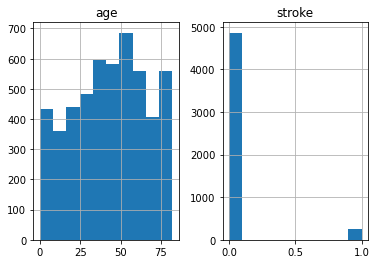

In [22]:
DataBase_use[["age","stroke"]].hist()

In [55]:
DataBase_use["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [29]:
DataBase_use[["avg_glucose_level","stroke"]].corr()

,avg_glucose_level,stroke
avg_glucose_level,1.000000,0.131945
stroke,0.131945,1.000000


In [30]:
DataBase_use[["age","stroke"]].corr()

,age,stroke
age,1.000000,0.245257
stroke,0.245257,1.000000


In [31]:
DataBase_use[["smoking_status","stroke"]].corr()

,stroke
stroke,1.0


In [41]:
DataBase_describe = DataBase_use.groupby("age").describe()
DataBase_describe

avg_glucose_level                                                  \
                  count        mean        std    min      25%      50%   
age                                                                       
0.08                2.0  105.000000  49.030784  70.33  87.6650  105.000   
0.16                3.0   98.006667  24.573751  69.79  89.6550  109.520   
0.24                5.0   94.112000  38.986613  57.09  58.3500   89.280   
0.32                5.0   91.004000  28.289532  55.86  73.7100   89.040   
0.40                2.0   97.605000  16.906923  85.65  91.6275   97.605   
...                 ...         ...        ...    ...      ...      ...   
78.00             102.0  119.664216  57.200484  55.32  78.4200   97.605   
79.00              85.0  113.806824  54.735114  57.08  76.6400   92.430   
80.00              70.0  119.772857  60.275913  56.99  74.1425   95.225   
81.00              60.0  117.180167  57.512928  57.42  76.6600   92.390   
82.00              56.0  130.483571  63.386352  56.75  81.8975  102.625   

                        stroke                                               
            75%     max  count      mean       std  min  25%  50%  75%  max  
age                                                                          
0.08   122.3350  139.67    2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
0.16   112.1150  114.71    3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
0.24   118.8700  146.97    5.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
0.32   108.6300  127.78    5.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
0.40   103.5825  109.56    2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
...         ...     ...    ...       ...       ...  ...  ...  ...  ...  ...  
78.00  150.5425  243.73  102.0  0.205882  0.406342  0.0  0.0  0.0  0.0  1.0  
79.00  127.2900  253.86   85.0  0.200000  0.402374  0.0  0.0  0.0  0.0  1.0  
80.00  148.8625  259.63   70.0  0.242857  0.431906  0.0  0.0  0.0  0.0  1.0  
81.00  164.9450  250.89   60.0  0.233333  0.426522  0.0  0.0  0.0  0.0  1.0  
82.00  209.1200  253.16   56.0  0.160714  0.370591  0.0  0.0  0.0  0.0  1.0  

[104 rows x 16 columns]

In [47]:
DataBase_stroke_1 = DataBase_use.sort_values("stroke",ascending = False)[["age","avg_glucose_level","stroke"]][0:249]
DataBase_stroke_1

,age,avg_glucose_level,stroke
0,67.0,228.69,1
171,79.0,60.94,1
158,71.0,195.71,1
159,81.0,74.02,1
160,76.0,57.92,1
...,...,...,...
83,68.0,79.79,1
82,79.0,88.92,1
81,66.0,101.45,1
80,59.0,96.16,1


<AxesSubplot:>

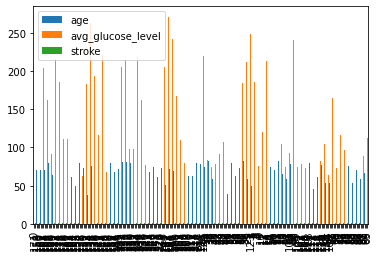

In [64]:
DataBase_stroke_1.plot(kind = 'bar')

In [52]:
#.where.dataset == "blabla"